In [ ]:
import kagglehub
import shutil
import os
# Download latest version
path = kagglehub.dataset_download("kaggleashwin/vehicle-type-recognition")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/vehicle-type-recognition


In [ ]:
local_path = "./CarMotor_dataset/"

# Ensure the local directory exists
os.makedirs(local_path, exist_ok=True)
# Copy the dataset to the local directory
for item in os.listdir(path):
    s = os.path.join(path, item)
    d = os.path.join(local_path, item)
    if os.path.isdir(s):
        shutil.copytree(s, d)
    else:
        shutil.copy2(s, d)

print(f"Dataset saved at: {local_path}")

print(f"Dataset saved at: {local_path}")

Dataset saved at: ./CarMotor_dataset/
Dataset saved at: ./CarMotor_dataset/


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
import os

folder_path = 'CarMotor_dataset/Dataset/Car'

# Count only image files
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.webp')
num_images = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(image_extensions))

print(f"Number of image files: {num_images}")


Number of image files: 100


In [ ]:
import os

folder_path = 'CarMotor_dataset/Dataset/motorcycle'

# Count only image files
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.webp')
num_images = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(image_extensions))

print(f"Number of image files: {num_images}")


Number of image files: 100


In [ ]:
import os, random, shutil

# Set up paths
source_path = "CarMotor_dataset/Dataset"
train_path = "CarMotor_dataset/train"
test_path = "CarMotor_dataset/test"
classes = ["Car", "motorcycle"]

# Make train and test folders
for cls in classes:
    os.makedirs(os.path.join(train_path, cls), exist_ok=True)
    os.makedirs(os.path.join(test_path, cls), exist_ok=True)

# Move 70% of images to train, 30% to test
for cls in classes:
    files = os.listdir(os.path.join(source_path, cls))
    random.shuffle(files)

    split = int(0.7 * len(files))
    train_files = files[:split]
    test_files = files[split:]

    for f in train_files:
        shutil.move(os.path.join(source_path, cls, f), os.path.join(train_path, cls, f))
    for f in test_files:
        shutil.move(os.path.join(source_path, cls, f), os.path.join(test_path, cls, f))

print("✅ Images moved into train/ and test/ folders.")


✅ Images moved into train/ and test/ folders.


In [ ]:
train_dir = "/content/CarMotor_dataset/train"
test_dir = "/content/CarMotor_dataset/test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)


Found 140 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu',padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(1024, (3,3), activation='relu',padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification (Cat vs Dog)
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.6106 - loss: 0.6145 - val_accuracy: 0.6500 - val_loss: 0.6009
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8316 - loss: 0.6035 - val_accuracy: 0.7833 - val_loss: 0.5887
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8070 - loss: 0.5964 - val_accuracy: 0.7833 - val_loss: 0.5417
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8833 - loss: 0.5339 - val_accuracy: 0.6333 - val_loss: 0.6359
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7893 - loss: 0.4749 - val_accuracy: 0.7500 - val_loss: 0.5206
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8504 - loss: 0.4025 - val_accuracy: 0.6333 - val_loss: 1.0804
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7988 - loss: 0.4983 - val_accuracy: 0.8333 - val_loss: 0.3563
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.8924 - loss: 0.2899 - val_accuracy: 0.6833 - val_loss: 0.6576
Epoch 9/20
3/3 ━

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7833 - loss: 0.4192
Test Accuracy: 0.78


In [ ]:
print(train_generator.class_indices)



{'Car': 0, 'motorcycle': 1}


In [ ]:
train_generator.classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

    prediction = model.predict(img_array)
    label = "Motorcycle" if prediction[0][0] > 0.5 else "Car"

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {label}", fontsize=14, fontweight='bold')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


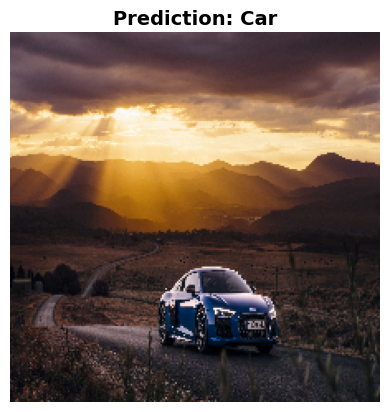

None


In [ ]:
img_path ="/content/CarMotor_dataset/test/Car/Image_24.jpg"
print(predict_image(img_path))

In [ ]:
img_path ="/content/CarMotor_dataset/test/motorcycle/Image_29.jpeg"
print(predict_image(img_path))

In [ ]:
img_path ="/content/CarMotor_dataset/test/Car/Image_32.jpg"
print(predict_image(img_path))

In [ ]:
img_path="/content/CarMotor_dataset/test/motorcycle/Image_79.jpg"
print(predict_image(img_path))